In [199]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

import igraph as ig
import networkx as nx

#from matplotlib import rc, rcParams
from matplotlib.colors import LogNorm

from scipy.integrate import odeint
from HTC_utils import *

from scipy.stats import truncnorm

# Varying connectivity

In [78]:
r1 = 0.001
r2 = 0.1

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus)
print(Tplus)

0.0009891196834817012
0.08333333333333334


In [85]:
ps = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6,]
#ps = [0.1, 0.3, 0.6]
Ts = [0.5*Tminus, Tminus + 0.5*(Tplus-Tminus), 2.*Tplus]
#Ts = [0.5*Tminus, Tminus + 0.3*(Tplus-Tminus), Tminus + 0.5*(Tplus-Tminus), Tminus + 0.7*(Tplus-Tminus), 2.*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

dt = 0.05
steps = int(1e3)
N = int(1e3)

res = []

for p in ps:
    tmp_res = []
    
    # Generate graphs
    print('[*] Generating topology for p={:.2f}'.format(p))
    top = ig.Graph.Erdos_Renyi(n=N, p=p).get_adjacency_sparse().toarray()
    # Homeostatic normalization
    top = normalize(top)
    
    for T in Ts:
        print('[-] T='+str(T))
        # Run model
        x, y = run_htc_single(None, xplus, yplus, T, r1, r2, dt, steps, N=N, runs=30)
        tmp_res.append(x)
    res.append(tmp_res)

[*] Generating topology for p=0.01
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.05
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.10
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.20
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.40
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.60
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669


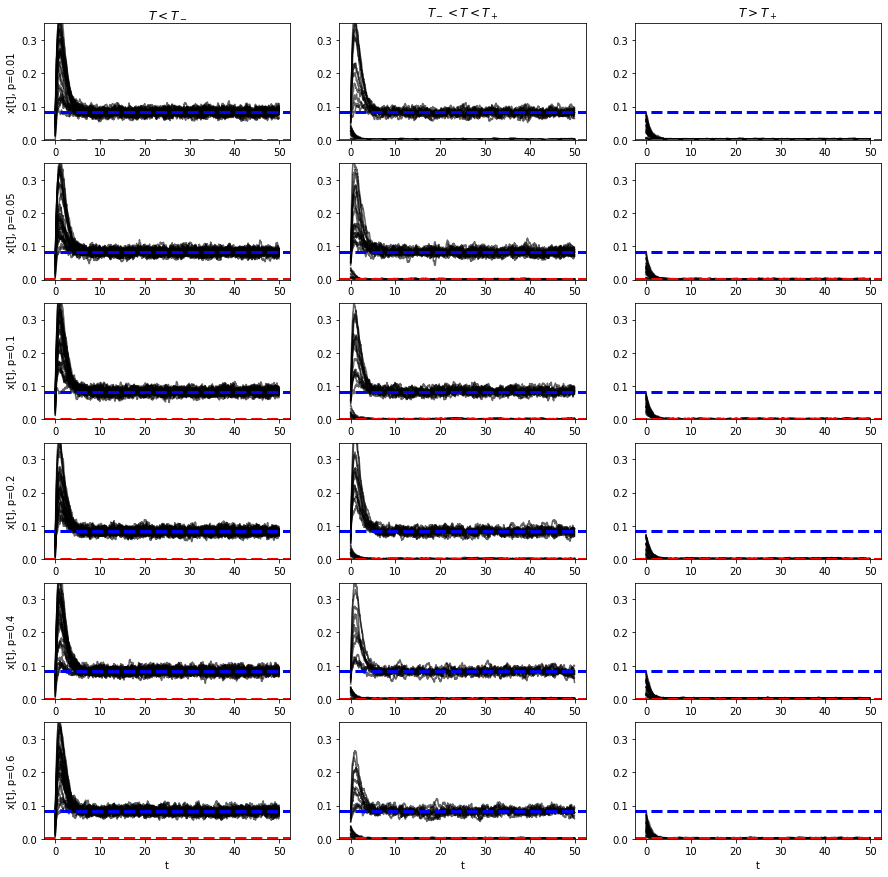

In [86]:
plt.figure(figsize=(15,15))

for i, p in enumerate(ps):
    for j, T in enumerate(Ts):
        plt.subplot(len(ps),len(Ts),i*len(Ts)+j+1)
        
        for traj in res[i][j]:
            plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
        plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
        plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
        plt.ylim([0,.35])
        
        if i==0:
            plt.title(titles[j])
        
        if j%len(Ts)==0:
            plt.ylabel('x[t], p='+str(p))
        if i==len(ps)-1:
            plt.xlabel('t')
plt.show()

In [99]:
ps = [0.05, 0.1, 0.2, 0.4, 0.6,]
dt = 0.05
steps = int(1e3)
N = int(1e3)

res_hist = []

for p in ps:    
    # Generate graphs
    print('[*] Generating topology for p={:.1f}'.format(p))
    top = ig.Graph.Erdos_Renyi(n=N, p=p).get_adjacency_sparse().toarray()
    
    # Homeostatic normalization
    top = normalize(top)
    
    tmp = run_htc_hysteresis(top, dt, steps, N=N, r1=r1, r2=r2, Tmin=xminus/5, Tmax=5*Tplus, Tdiv_log=True, nT=40, runs=1, display=True)
    res_hist.append(tmp)

End simulating activity
Total computation time: 38.11s


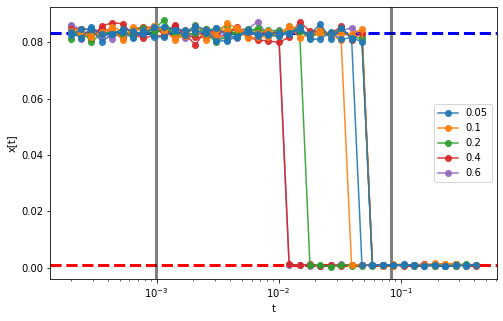

In [105]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_hist):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

In [122]:
ps = [0.05, 0.1, 0.2, 0.3, 0.4, 0.6]
dt = 0.05
steps = int(1e4)
N = int(1e3)

res_hist_2 = []

for p in ps:    
    # Generate graphs
    print('[*] Generating topology for p={:.1f}'.format(p))
    top = ig.Graph.Erdos_Renyi(n=N, p=p).get_adjacency_sparse().toarray()
    
    # Homeostatic normalization
    top = normalize(top)
    
    tmp = run_htc_hysteresis(top, dt, steps, N=N, r1=r1, r2=r2, Tmin=0.01, Tmax=0.06, Tdiv_log=False, nT=40, runs=1, display=True)
    res_hist_2.append(tmp)
    

End simulating activity
Total computation time: 226.54s


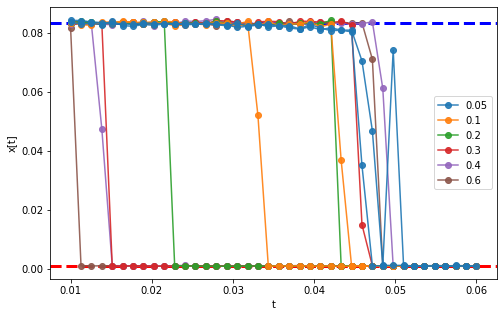

In [124]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_hist_2):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

#plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

#plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
#plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

In [137]:
ps = [0.01, 0.05, 0.1]
dt = 0.05
steps = int(1e3)
N = int(1e3)

res_hist_22 = []

for p in ps:    
    # Generate graphs
    print('[*] Generating topology for p={:.1f}'.format(p))
    # check if connected
    top = ig.Graph.Erdos_Renyi(n=N, p=p).get_adjacency_sparse().toarray()
    
    # Homeostatic normalization
    top = normalize(top)
    
    tmp = run_htc_hysteresis(top, dt, steps, N=N, r1=r1, r2=r2, Tmin=0.025, Tmax=0.055, Tdiv_log=False, nT=60, runs=1, display=True)
    res_hist_22.append(tmp)
    

End simulating activity
Total computation time: 71.65s


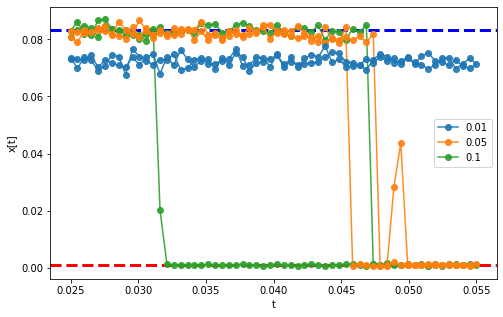

In [138]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_hist_22):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

#plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

#plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
#plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

In [114]:
ps = [0.1]
ks = np.arange(0,1+0.1,0.1)
#Ts = [Tminus + 0.5*(Tplus-Tminus)]
Ts = Tminus + ks*(Tplus-Tminus)
#Ts = [0.5*Tminus, Tminus + 0.3*(Tplus-Tminus), Tminus + 0.5*(Tplus-Tminus), Tminus + 0.7*(Tplus-Tminus), 2.*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

dt = 0.05
steps = int(1e4)
N = int(1e3)

res_1 = []

for p in ps:
    tmp_res = []
    
    # Generate graphs
    print('[*] Generating topology for p={:.1f}'.format(p))
    top = ig.Graph.Erdos_Renyi(n=N, p=p).get_adjacency_sparse().toarray()
    
    # Homeostatic normalization
    top = normalize(top)
    
    for T in Ts:
        print('[-] T='+str(T))
        # Run model
        x, y = run_htc_single(None, xplus, yplus, T, r1, r2, dt, steps, N=N, runs=30)
        tmp_res.append(x)
    res_1.append(tmp_res)

[*] Generating topology for p=0.1
[-] T=0.0009891196834817012
[-] T=0.009223541048466866
[-] T=0.01745796241345203
[-] T=0.0256923837784372
[-] T=0.033926805143422355
[-] T=0.04216122650840752
[-] T=0.05039564787339269
[-] T=0.05863006923837785
[-] T=0.06686449060336301
[-] T=0.07509891196834818
[-] T=0.08333333333333334


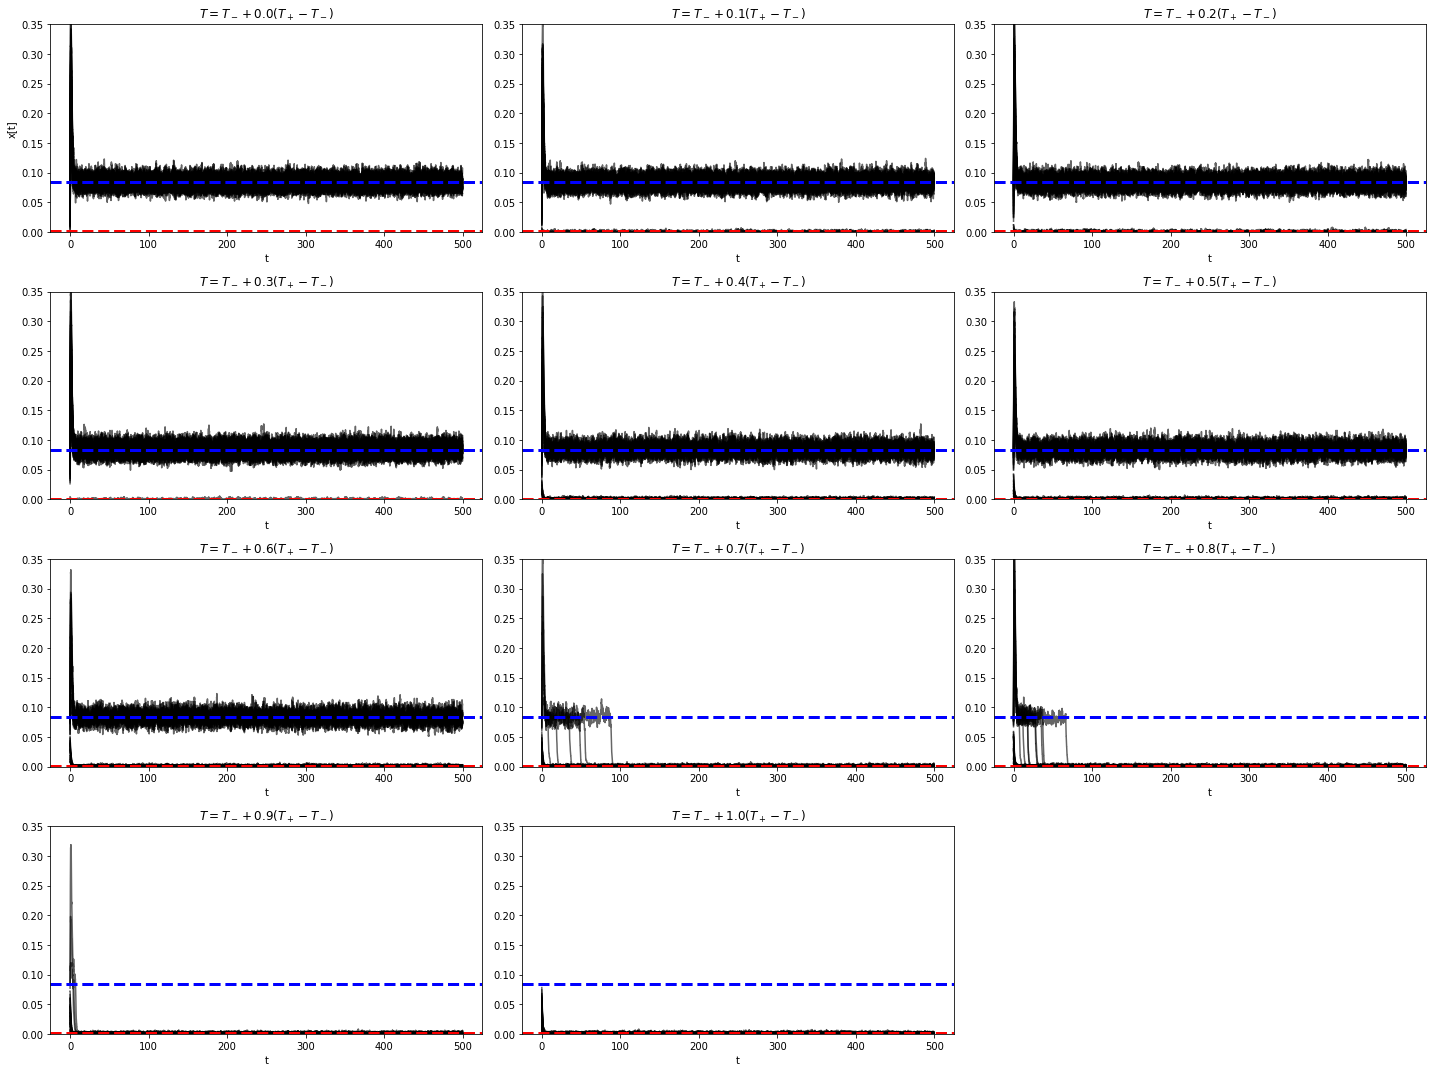

In [115]:
plt.figure(figsize=(20,15))

for j, T in enumerate(Ts):
    plt.subplot(4,len(Ts)//3,j+1)
        
    for traj in res_1[0][j]:
        plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
    plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
    plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
    plt.ylim([0,.35])
        
    if j==0:
        plt.ylabel('x[t]')
    plt.xlabel('t')
    plt.title(r'$T=T_- + $'+str(np.round(ks[j],1))+r'$(T_+ - T_-)$')

plt.tight_layout()
plt.show()

# Change weights distributions
* uniform
* power law/exponential (see other works)
* truncated normal

In [19]:
def generate_random(pdf, N):
    if pdf == 'uniform':
        mat = np.random.uniform(size=(N,N))
    elif pdf == 'exp':
        lmbd = 12.5
        mat = np.random.exponential(scale=1/lmbd, size=(N,N))
    elif pdf == 'normal':
        mat = truncnorm.rvs(0, 1, size=(N,N))
    
    # Symmetrize
    mat = np.triu(mat, k=1)
    mat += mat.T
    
    return mat

In [20]:
pdfs = ['uniform', 'exp', 'normal']
#pdfs = ['uniform']

dt = 0.05
steps = int(1e3)
N = int(1e3)

res_2 = []

for pdf in pdfs:
    
    # Generate graphs
    print('[*] Generating topology for pdf:'+pdf)
    top = generate_random(pdf, N)
    # Homeostatic normalization
    top = normalize(top)
    
    # Run model
    tmp = run_htc_hysteresis(top, dt, steps, N=N, r1=r1, r2=r2, Tmin=xminus/5, Tmax=5*Tplus, Tdiv_log=True, nT=20, runs=1, display=True)
    res_2.append(tmp)

End simulating activity
Total computation time: 37.00s


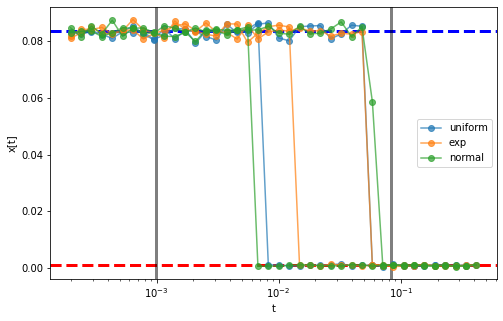

In [21]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_2):
    plt.plot(res[0], res[1], '-o', zorder=2, label=pdfs[i], alpha=0.7)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

In [130]:
pdfs = ['uniform', 'exp', 'normal']
Ts = [0.5*Tminus, Tminus + 0.5*(Tplus-Tminus), 2.*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

dt = 0.05
steps = int(1e3)
N = int(1e3)

res_3 = []

for pdf in pdfs:
    tmp_res = []
    
    # Generate graphs
    print('[*] Generating topology for pdf='+ pdf)
    top = generate_random(pdf, N)
    # Homeostatic normalization
    top = normalize(top)
    
    for T in Ts:
        print('[-] T='+str(T))
        # Run model
        x, y = run_htc_single(top, xplus, yplus, T, r1, r2, dt, steps, N=N, runs=30)
        tmp_res.append(x)
    res_3.append(tmp_res)

[*] Generating topology for pdf=uniform
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for pdf=exp
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for pdf=normal
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669


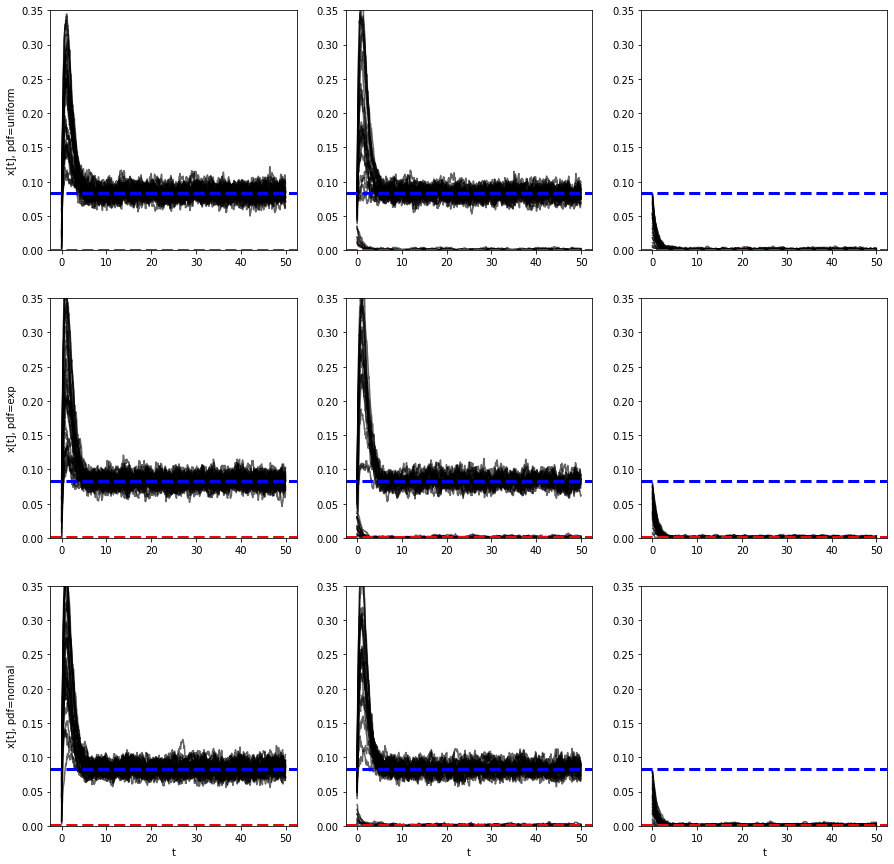

In [131]:
plt.figure(figsize=(15,15))

for i, pdf in enumerate(pdfs):
    for j, T in enumerate(Ts):
        plt.subplot(len(pdfs),len(Ts),i*len(Ts)+j+1)
        
        for traj in res_3[i][j]:
            plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
        plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
        plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
        plt.ylim([0,.35])
        
        if j%len(Ts)==0:
            plt.ylabel('x[t], pdf='+str(pdfs[i]))
        if i==len(pdfs)-1:
            plt.xlabel('t')
plt.show()

# Change connectivity + weights

In [26]:
pdfs = ['uniform', 'exp', 'normal']
ps = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8]

Ts = [0.5*Tminus, Tminus + 0.5*(Tplus-Tminus), 2.*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

dt = 0.05
steps = int(1e3)
N = int(1e3)

res_3 = []

for pdf in pdfs:
    tmp_res_1 = []
    
    for p in ps:
        tmp_res_2 = []
        
        # Generate weights
        print('[*] Generating topology for pdf='+ pdf)
        weights = generate_random(pdf, N)
        
        # Generate graphs
        print('[*] Generating topology for p='+ str(p))
        top = ig.Graph.Erdos_Renyi(n=N, p=p).get_adjacency_sparse().toarray()
        
        # Mask weights with network
        top = weights * top
        
        # Homeostatic normalization
        top = normalize(top)
    
        for T in Ts:
            print('[-] T='+str(T))
            # Run model
            x, y = run_htc_single(top, xplus, yplus, T, r1, r2, dt, steps, N=N, runs=30)
            tmp_res_2.append(x)
        tmp_res_1.append(tmp_res_2)
    res_3.append(tmp_res_1)

[*] Generating topology for p=0.1
[*] Generating topology for pdf=uniform
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.2
[*] Generating topology for pdf=uniform
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.3
[*] Generating topology for pdf=uniform
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.4
[*] Generating topology for pdf=uniform
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.6
[*] Generating topology for pdf=uniform
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.8
[*] Generating topology for pdf=uniform
[-] T=0.0004945598417408506
[-] T=0.04216122650840752
[-] T=0.16666666666666669
[*] Generating topology for p=0.1
[*] Generating topology for pdf=exp
[-] T=

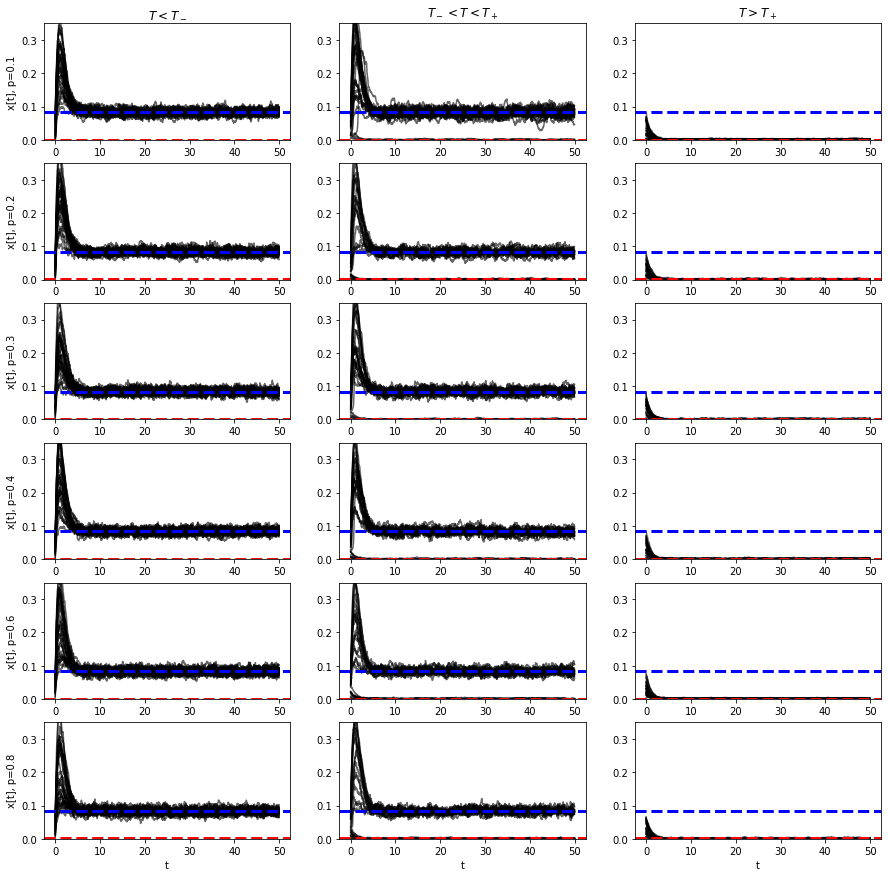

In [27]:
plt.figure(figsize=(15,15))

for i, p in enumerate(ps):
    for j, T in enumerate(Ts):
        plt.subplot(len(ps),len(Ts),i*len(Ts)+j+1)
        
        for traj in res_3[0][i][j]:
            plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
        plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
        plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
        plt.ylim([0,.35])
        
        if i==0:
            plt.title(titles[j])
        
        if j%len(Ts)==0:
            plt.ylabel('x[t], p='+str(p))
        if i==len(ps)-1:
            plt.xlabel('t')
plt.show()

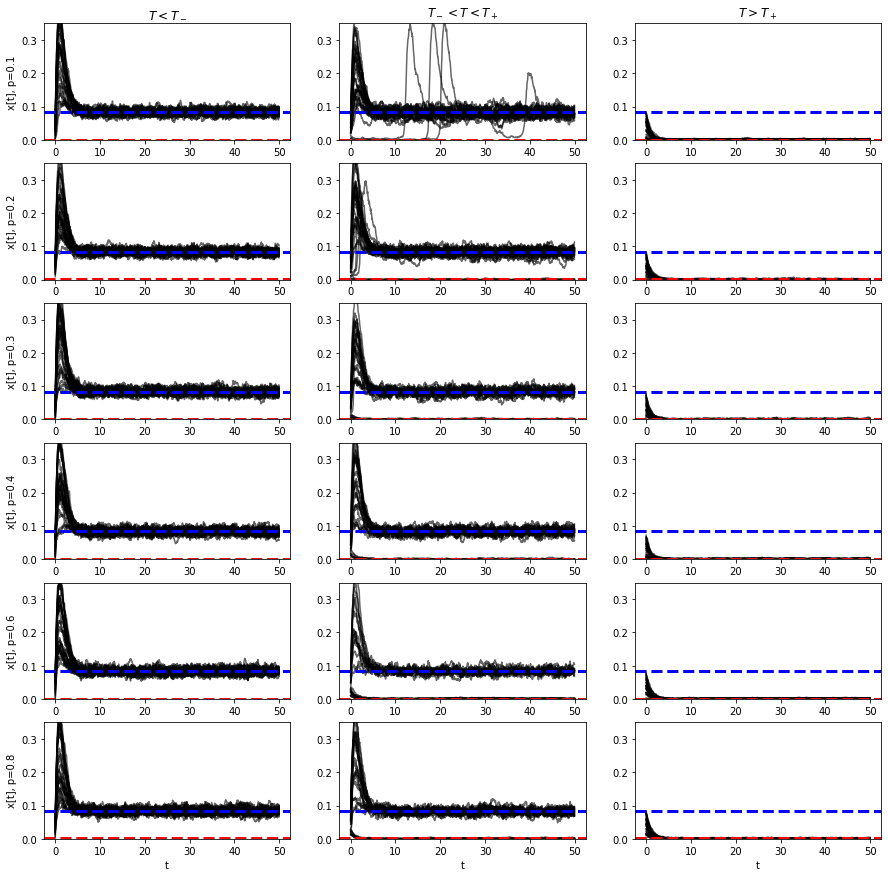

In [28]:
plt.figure(figsize=(15,15))

for i, p in enumerate(ps):
    for j, T in enumerate(Ts):
        plt.subplot(len(ps),len(Ts),i*len(Ts)+j+1)
        
        for traj in res_3[1][i][j]:
            plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
        plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
        plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
        plt.ylim([0,.35])
        
        if i==0:
            plt.title(titles[j])
        
        if j%len(Ts)==0:
            plt.ylabel('x[t], p='+str(p))
        if i==len(ps)-1:
            plt.xlabel('t')
plt.show()

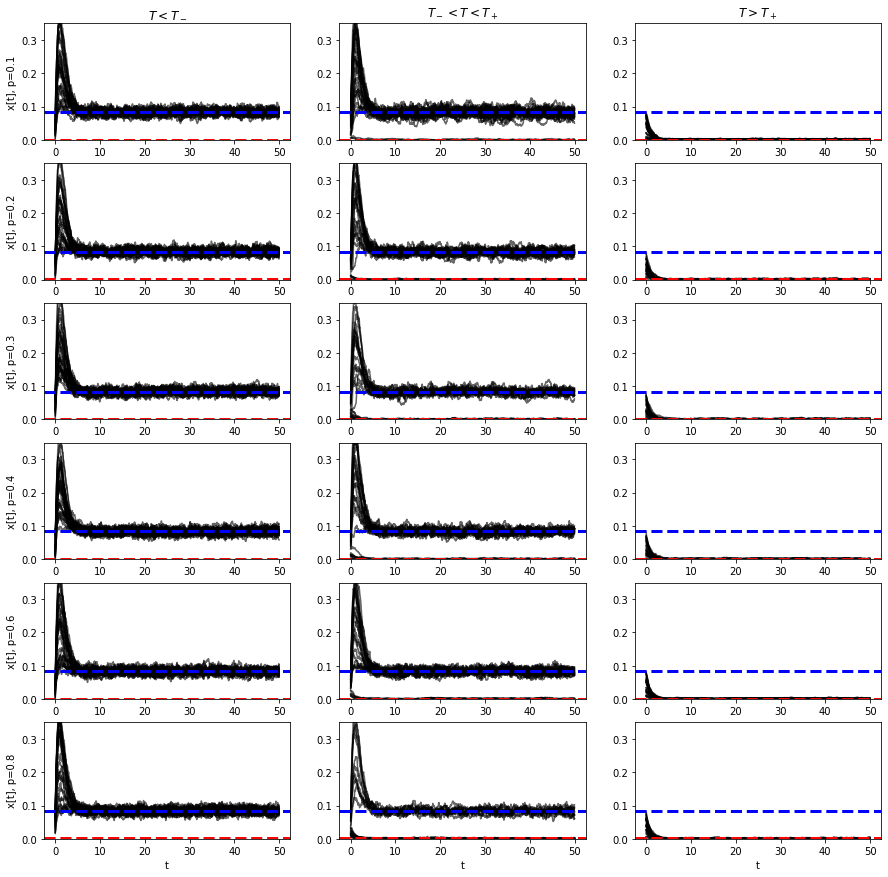

In [29]:
plt.figure(figsize=(15,15))

for i, p in enumerate(ps):
    for j, T in enumerate(Ts):
        plt.subplot(len(ps),len(Ts),i*len(Ts)+j+1)
        
        for traj in res_3[2][i][j]:
            plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
        plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
        plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
        plt.ylim([0,.35])
        
        if i==0:
            plt.title(titles[j])
        
        if j%len(Ts)==0:
            plt.ylabel('x[t], p='+str(p))
        if i==len(ps)-1:
            plt.xlabel('t')
plt.show()

In [133]:
pdfs = ['uniform', 'exp', 'normal']
ps = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8]

Ts = [0.5*Tminus, Tminus + 0.5*(Tplus-Tminus), 2.*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

dt = 0.05
steps = int(1e3)
N = int(1e3)

res_3 = []

for pdf in pdfs:
    tmp_res_1 = []
    
    for p in ps:        
        # Generate weights
        print('[*] Generating topology for pdf='+ pdf)
        weights = generate_random(pdf, N)
        
        # Generate graphs
        print('[*] Generating topology for p='+ str(p))
        top = ig.Graph.Erdos_Renyi(n=N, p=p).get_adjacency_sparse().toarray()
        
        # Mask weights with network
        top = weights * top
        
        # Homeostatic normalization
        top = normalize(top)
        
        tmp = run_htc_hysteresis(top, dt, steps, N=N, r1=r1, r2=r2, Tmin=xminus/5, Tmax=5*Tplus, Tdiv_log=True, nT=40, runs=1, display=True)
    
        tmp_res_1.append(tmp)
    res_3.append(tmp_res_1)

End simulating activity
Total computation time: 48.75s


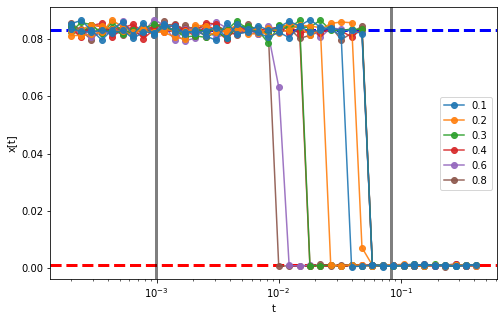

In [134]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_3[0]):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

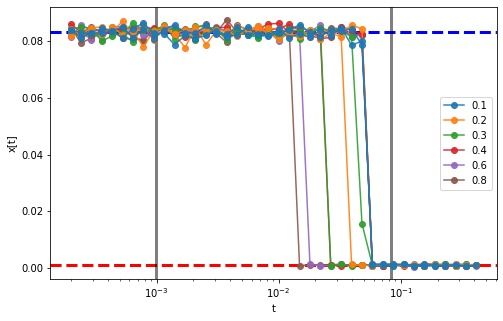

In [135]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_3[1]):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

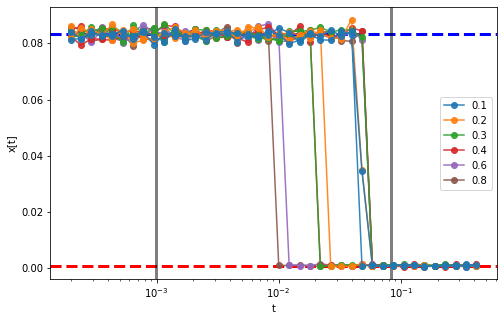

In [136]:
plt.figure(figsize=(8,5))

for i, res in enumerate(res_3[2]):
    plt.plot(res[0], res[1], '-o', zorder=50-i, label=ps[i], alpha=0.9)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

plt.legend()
plt.show()

In [52]:
weights = generate_random('exp', N=int(1e3))
top = ig.Graph.Erdos_Renyi(n=N, p=0.1).get_adjacency_sparse().toarray()

top = normalize(top*weights)

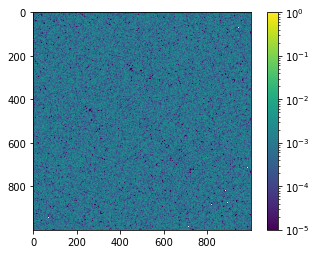

In [53]:
plt.imshow(top, norm=LogNorm(vmin=1e-5, vmax=1))
plt.colorbar()
plt.show()

# Connectome

In [162]:
W = np.loadtxt('connectome.txt')
N = W.shape[0]
links = len(W[np.triu_indices(N,1)].nonzero()[0])
print('Size:', W.shape[0])
print('Number of links:', links)
print('Probabilty:', np.round(links/N/(N-1),2))

Size: 998
Number of links: 39787
Probabilty: 0.04


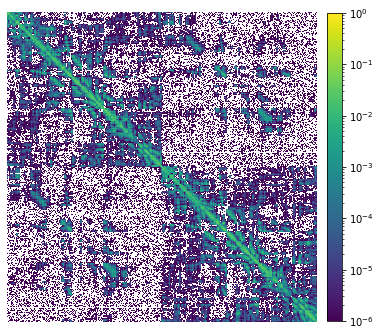

In [164]:
plt.figure(figsize=(6,6))
im = plt.imshow(W, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [3]:
W = np.loadtxt('connectome.txt')
W = normalize(W)

In [5]:
dt = 0.05
steps = int(5e3)

res_connectome_1 = []
    
# Run model
tmp = run_htc_hysteresis(W, dt, steps, N=W.shape[0], r1=r1, r2=r2, Tmin=xminus/5, Tmax=5*Tplus, Tdiv_log=True, nT=40, runs=1, display=True)
res_connectome_1.append(tmp)

End simulating activity
Total computation time: 91.61s


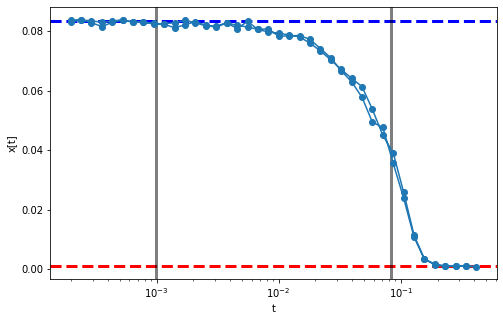

In [6]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_1[0][0], res_connectome_1[0][1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

In [13]:
ks = np.arange(0,1.4,0.1)
Ts = Tminus + ks*(Tplus-Tminus)

dt = 0.05
steps = int(1e3)
N = int(1e3)

res_connectome = []
    
for T in Ts:
    print('[-] T='+str(T))
    # Run model
    x, y = run_htc_single(W, xplus, yplus, T, r1, r2, dt, steps, N=W.shape[0], runs=30)
    res_connectome.append(x)

[-] T=0.0009891196834817012
[-] T=0.009223541048466866
[-] T=0.01745796241345203
[-] T=0.0256923837784372
[-] T=0.033926805143422355
[-] T=0.04216122650840752
[-] T=0.05039564787339269
[-] T=0.05863006923837785
[-] T=0.06686449060336301
[-] T=0.07509891196834818
[-] T=0.08333333333333334
[-] T=0.09156775469831852
[-] T=0.09980217606330369
[-] T=0.10803659742828883


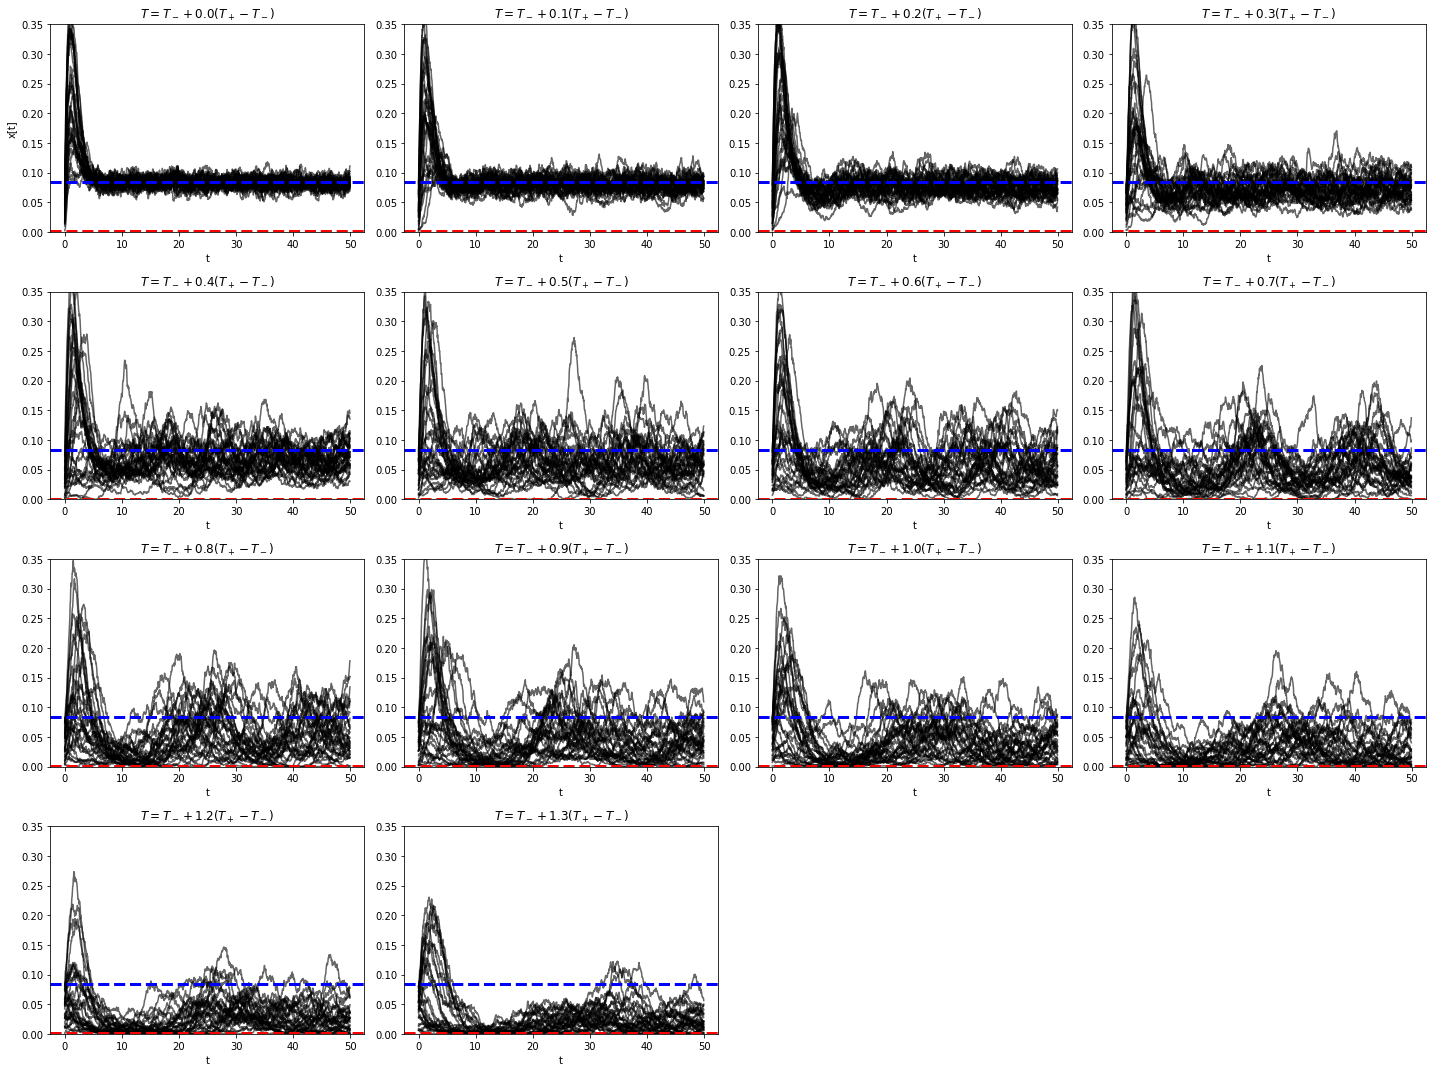

In [14]:
plt.figure(figsize=(20,15))

for j, T in enumerate(Ts):
    plt.subplot(4,len(Ts)//3,j+1)
        
    for traj in res_connectome[j]:
        plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
    plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
    plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
    plt.ylim([0,.35])
        
    if j==0:
        plt.ylabel('x[t]')
    plt.xlabel('t')
    plt.title(r'$T=T_- + $'+str(np.round(ks[j],1))+r'$(T_+ - T_-)$')

plt.tight_layout()
plt.show()

# Randomized connectome

In [160]:
Wrand = np.load('randomized/333749_8.txt.npy')

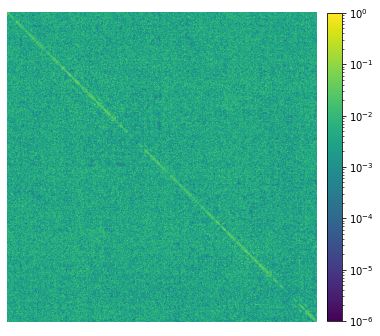

In [161]:
plt.figure(figsize=(6,6))
im = plt.imshow(Wrand, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [165]:
Wrand = normalize(Wrand)

In [166]:
dt = 0.05
steps = int(5e3)

res_connectome_rand = []
    
# Run model
tmp = run_htc_hysteresis(Wrand, dt, steps, N=W.shape[0], r1=r1, r2=r2, Tmin=xminus/5, Tmax=5*Tplus, Tdiv_log=True, nT=40, runs=1, display=True)
res_connectome_rand.append(tmp)

End simulating activity
Total computation time: 149.42s


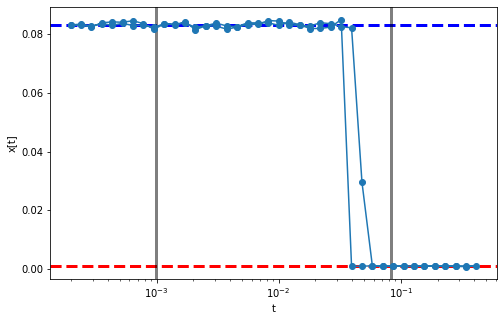

In [167]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_rand[0][0], res_connectome_rand[0][1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

In [168]:
dt = 0.05
steps = int(5e4)

res_connectome_rand = []
    
# Run model
tmp = run_htc_hysteresis(Wrand, dt, steps, N=W.shape[0], r1=r1, r2=r2, Tmin=xminus/5, Tmax=5*Tplus, Tdiv_log=True, nT=40, runs=1, display=True)
res_connectome_rand.append(tmp)

End simulating activity
Total computation time: 1099.35s


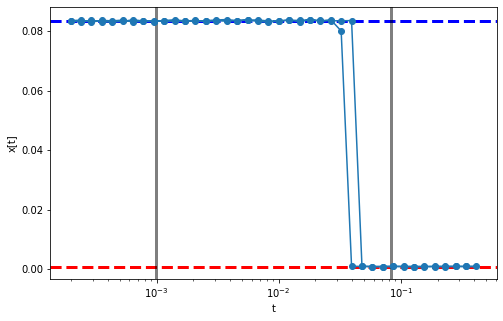

In [170]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_rand[0][0], res_connectome_rand[0][1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

In [171]:
dt = 0.05
steps = int(5e4)

res_connectome_rand = []
    
# Run model
tmp = run_htc_hysteresis(Wrand, dt, steps, N=W.shape[0], r1=r1, r2=r2, Tmin=1e-2, Tmax=1e-1, Tdiv_log=False, nT=40, runs=1, display=True)
res_connectome_rand.append(tmp)

End simulating activity
Total computation time: 1059.60s


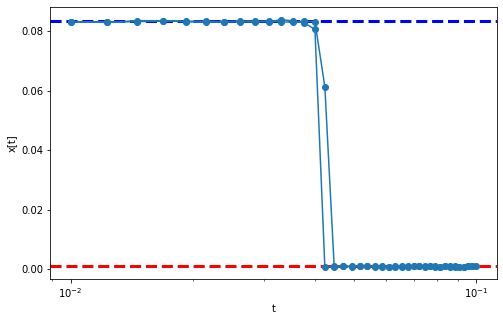

In [173]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_rand[0][0], res_connectome_rand[0][1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

#plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
#plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

In [176]:
ks = np.arange(0,1.4,0.1)
Ts = Tminus + ks*(Tplus-Tminus)

dt = 0.05
steps = int(1e3)
N = int(1e3)

res_connectome_rand_traj = []
    
for T in Ts:
    print('[-] T='+str(T))
    # Run model
    x, y = run_htc_single(Wrand, xplus, yplus, T, r1, r2, dt, steps, N=W.shape[0], runs=30)
    res_connectome_rand_traj.append(x)

[-] T=0.0009891196834817012
[-] T=0.009223541048466866
[-] T=0.01745796241345203
[-] T=0.0256923837784372
[-] T=0.033926805143422355
[-] T=0.04216122650840752
[-] T=0.05039564787339269
[-] T=0.05863006923837785
[-] T=0.06686449060336301
[-] T=0.07509891196834818
[-] T=0.08333333333333334
[-] T=0.09156775469831852
[-] T=0.09980217606330369
[-] T=0.10803659742828883


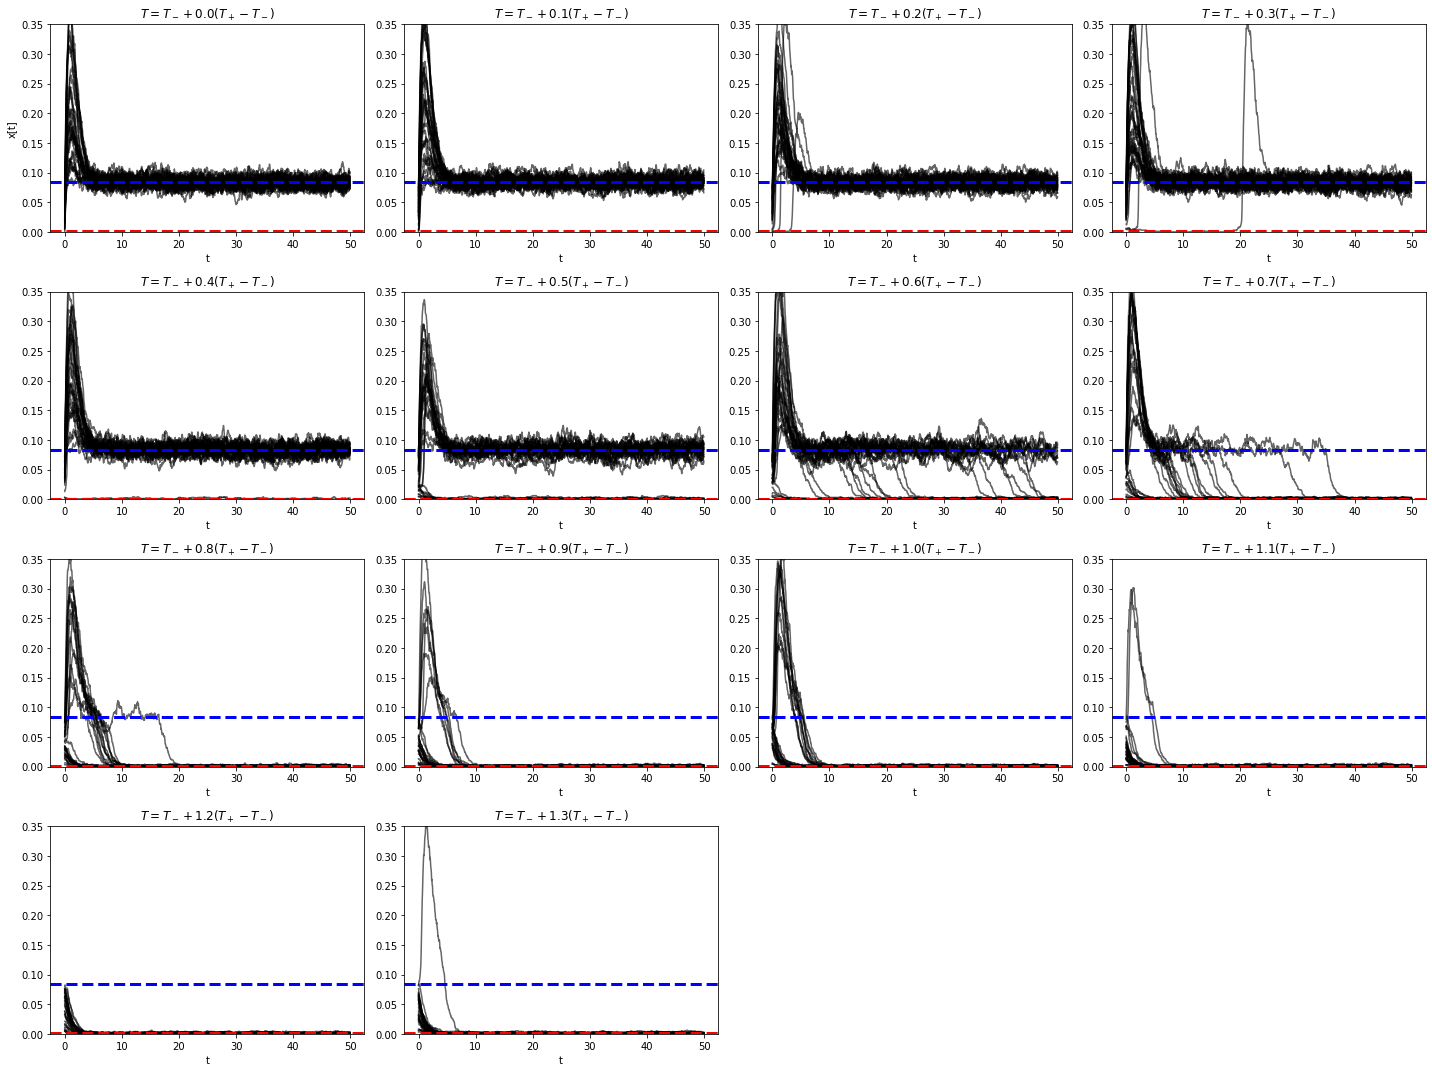

In [177]:
plt.figure(figsize=(20,15))

for j, T in enumerate(Ts):
    plt.subplot(4,len(Ts)//3,j+1)
        
    for traj in res_connectome_rand_traj[j]:
        plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
    plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
    plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
    plt.ylim([0,.35])
        
    if j==0:
        plt.ylabel('x[t]')
    plt.xlabel('t')
    plt.title(r'$T=T_- + $'+str(np.round(ks[j],1))+r'$(T_+ - T_-)$')

plt.tight_layout()
plt.show()

# Binarized connectome

In [218]:
Wbin = np.loadtxt('connectome.txt')
Wbin = (Wbin>0).astype(int)

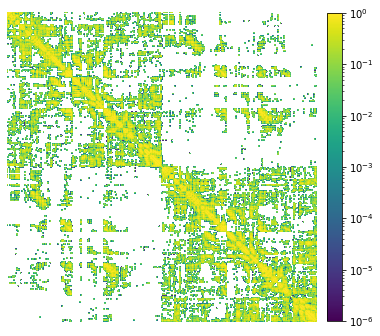

In [219]:
plt.figure(figsize=(6,6))
im = plt.imshow(Wbin, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

In [220]:
Wbin = normalize(Wbin)

In [194]:
dt = 0.05
steps = int(1e3)

res_connectome_rand_hist = []
    
# Run model
tmp = run_htc_hysteresis(Wrand, dt, steps, N=W.shape[0], r1=r1, r2=r2, Tmin=xminus/5, Tmax=5*Tplus, Tdiv_log=True, nT=40, runs=1, display=True)
res_connectome_rand_hist.append(tmp)

End simulating activity
Total computation time: 56.92s


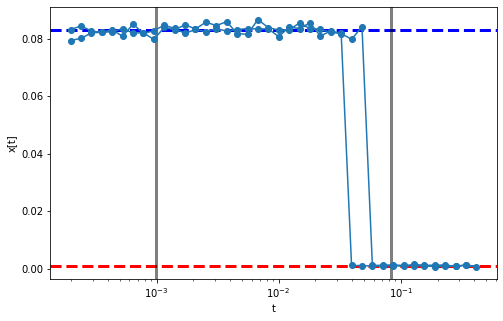

In [195]:
plt.figure(figsize=(8,5))

plt.plot(res_connectome_rand_hist[0][0], res_connectome_rand_hist[0][1], '-o', zorder=2)

plt.xscale('log')
plt.xlabel('t')
plt.ylabel('x[t]')

plt.axhline(xplus, ls='--', c='blue', lw=3, zorder=1)
plt.axhline(xminus, ls='--', c='r', lw=3, zorder=1)

plt.axvline(xplus, lw=3, zorder=1, c='k', alpha=0.5)
plt.axvline(xminus, lw=3, zorder=1, c='k', alpha=0.5)

#plt.legend()
plt.show()

In [192]:
ks = np.arange(0,1.4,0.1)
Ts = Tminus + ks*(Tplus-Tminus)

dt = 0.05
steps = int(1e3)
N = int(1e3)

res_connectome_bin = []
    
for T in Ts:
    print('[-] T='+str(T))
    # Run model
    x, y = run_htc_single(Wbin, xplus, yplus, T, r1, r2, dt, steps, N=W.shape[0], runs=30)
    res_connectome_bin.append(x)

[-] T=0.0009891196834817012
[-] T=0.009223541048466866
[-] T=0.01745796241345203
[-] T=0.0256923837784372
[-] T=0.033926805143422355
[-] T=0.04216122650840752
[-] T=0.05039564787339269
[-] T=0.05863006923837785
[-] T=0.06686449060336301
[-] T=0.07509891196834818
[-] T=0.08333333333333334
[-] T=0.09156775469831852
[-] T=0.09980217606330369
[-] T=0.10803659742828883


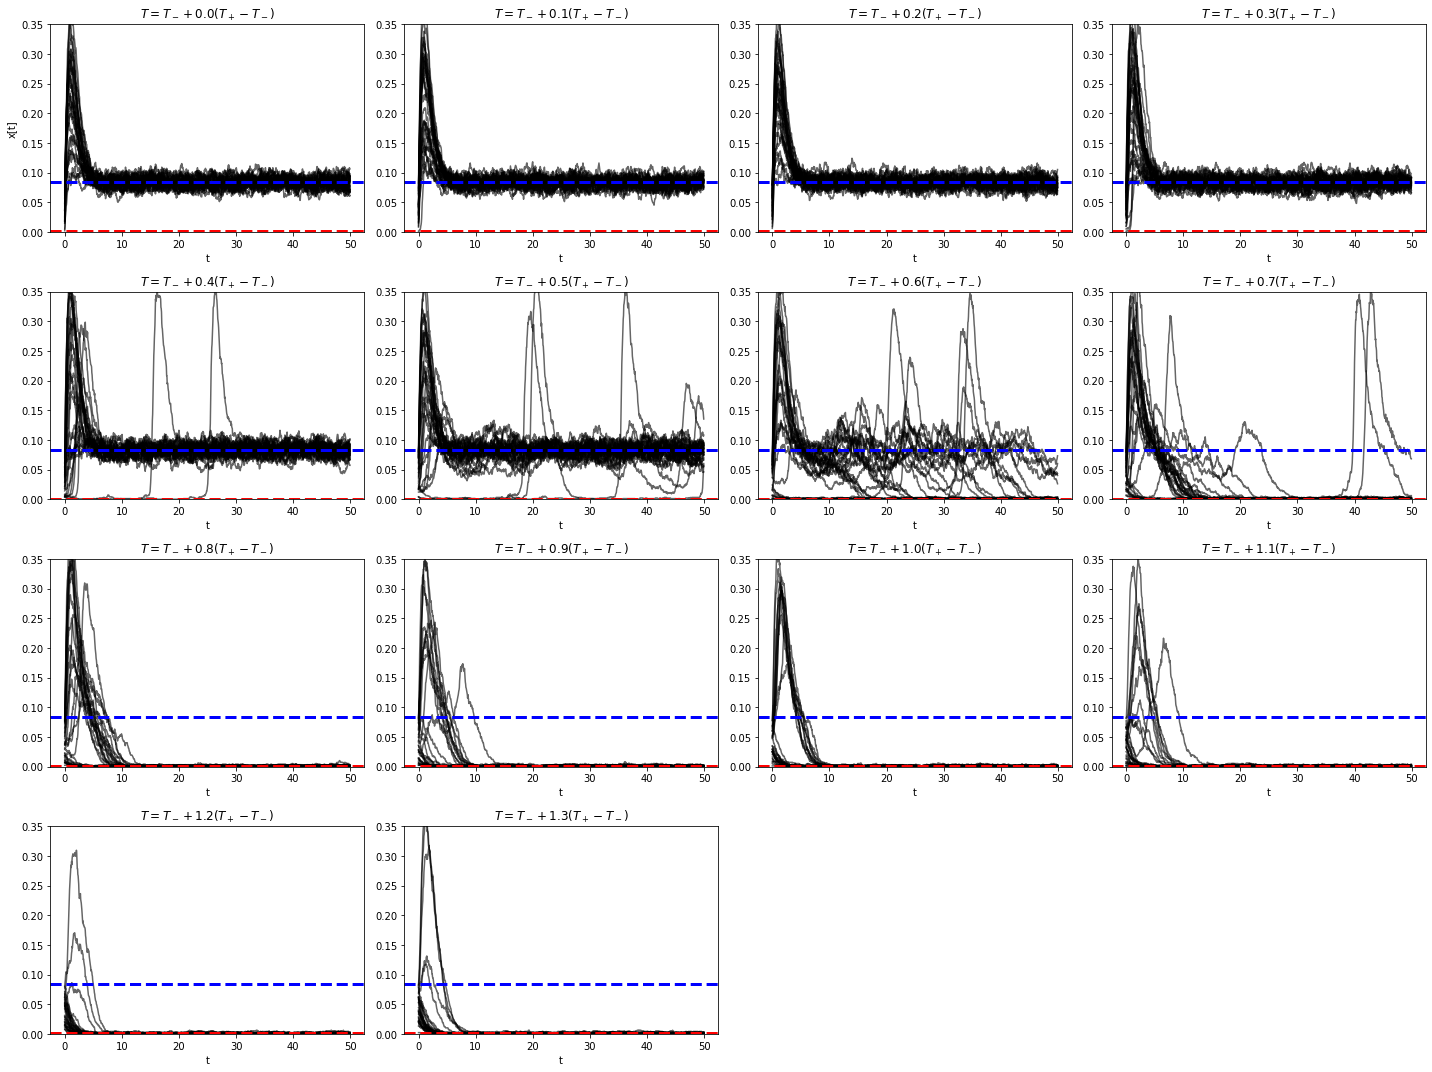

In [193]:
plt.figure(figsize=(20,15))

for j, T in enumerate(Ts):
    plt.subplot(4,len(Ts)//3,j+1)
        
    for traj in res_connectome_bin[j]:
        plt.plot(np.arange(steps)*dt, traj, c='k', alpha=0.6)
    plt.axhline(xplus, ls='--', c='blue', label=r'$x_+$', lw=3)
    plt.axhline(xminus, ls='--', c='r', label=r'$x_-$', lw=3)
    plt.ylim([0,.35])
        
    if j==0:
        plt.ylabel('x[t]')
    plt.xlabel('t')
    plt.title(r'$T=T_- + $'+str(np.round(ks[j],1))+r'$(T_+ - T_-)$')

plt.tight_layout()
plt.show()

In [123]:
# plot trajectories also on phase space

In [200]:
# Try with networks, same mean degree as connectome:
# - small world low p
# - small world high p
# - communities

# Power spectrum

In [221]:
def Psup(w, r1, r2):
    return ( (2*r2 * (1 + r2 + r2**2 + w**2))
           / (1 + 2*r2) / ( (1 + 2*r2)**2 + (2 + r2**2)*w**2 + w**4) )

def Psub(w,r1,r2):
    return ( 2*r1*r2 * (r1**2 + r1*r2 + r2**2 + w**2) /
          (r1 + r2 + r1*r2)  / ((r1 + r2 + r1*r2)**2 + (1 + r1**2 + r2**2)*w**2 + w**4 ))

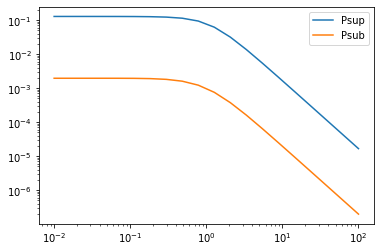

In [231]:
w = np.logspace(-2, 2, 20)

plt.plot(w, Psup(w,r1,r2), label='Psup')
plt.plot(w, Psub(w,r1,r2), label='Psub')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()